**This is a data analysis of the different factors that effect student performance.  The objective is to find the factors that increase student performance.**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Data/student_performance_data.csv')

**EDA - Get to know the data**

In [5]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1


In [6]:
# Drop 'Grade Class' column because it's counter intuitive. It will confuse third party viewers by suggesting opposite correlations of what truly is.
df2 = df.drop('GradeClass', axis=1)

df2

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297


In [7]:
# Define function that sets new grade class that makes sense intuitively.
def get_grade_class(gpa):
    if gpa < 2.0:
        return 0
    elif 2.0 <= gpa < 2.5:
        return 1
    elif 2.5 <= gpa < 3.0:
        return 2
    elif 3.0 <= gpa < 3.5:
        return 3
    else:
        return 4

In [8]:
# Create a new, standardized 'Grade_Scale' column based on the GPA.
df2['Grade_Scale'] = df2['GPA'].apply(lambda x: get_grade_class(x))

df2

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Grade_Scale
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,3
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,3
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,3
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,0


In [9]:
# Define a function that returns the 'Ethnicity' explicitly instead of a code of reference. It helps for visual graphing.
def get_ethnicity(code):
    if code == 0:
        return 'Caucasian'
    elif code == 1:
        return 'African American'
    elif code == 2:
        return 'Asian'
    else:
        return 'Other'

In [10]:
# Create new series object made up of 'Ethnicity' explicitly displayed instead of code of reference
df2['Ethnicity2'] = df2['Ethnicity'].apply(lambda x: get_ethnicity(x))

df2

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Grade_Scale,Ethnicity2
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2,Caucasian
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,3,Caucasian
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0,Asian
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,1,Caucasian
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0,Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,3,Caucasian
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,3,Caucasian
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,0,Caucasian
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,0,African American


In [11]:
# Define a column that returns gender explicitly instead of a code of reference.
def get_gender(code):
    if code == 0:
        return 'Male'
    else:
        return 'Female'

In [12]:
# Create new series object made up of 'Ethnicity' explicity instead of code of reference
df2['Gender2'] = df2['Gender'].apply(lambda x: get_gender(x))

df2

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Grade_Scale,Ethnicity2,Gender2
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2,Caucasian,Female
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,3,Caucasian,Male
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0,Asian,Male
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,1,Caucasian,Female
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0,Caucasian,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,3,Caucasian,Female
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,3,Caucasian,Male
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,0,Caucasian,Female
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,0,African American,Female


*Round decimals to two places.*

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [15]:
df2

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Grade_Scale,Ethnicity2,Gender2
0,1001,17,1,0,2,19.83,7,1,2,0,0,1,0,2.93,2,Caucasian,Female
1,1002,18,0,0,1,15.41,0,0,1,0,0,0,0,3.04,3,Caucasian,Male
2,1003,15,0,2,3,4.21,26,0,2,0,0,0,0,0.11,0,Asian,Male
3,1004,17,1,0,3,10.03,14,0,3,1,0,0,0,2.05,1,Caucasian,Female
4,1005,17,1,0,2,4.67,17,1,3,0,0,0,0,1.29,0,Caucasian,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.68,2,0,4,1,0,0,0,3.46,3,Caucasian,Female
2388,3389,17,0,0,1,7.58,4,1,4,0,1,0,0,3.28,3,Caucasian,Male
2389,3390,16,1,0,2,6.81,20,0,2,0,0,0,1,1.14,0,Caucasian,Female
2390,3391,16,1,1,0,12.42,17,0,2,0,1,1,0,1.80,0,African American,Female


In [16]:
df2.shape

(2392, 17)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  Grade_Scale        2392 non-null   int64  
 15  Ethnicity2         2392 non-null   object 
 16  Gender2            2392 

In [18]:
df2.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Grade_Scale
count,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00
mean,2196.50,16.47,0.51,0.88,1.75,9.77,14.54,0.30,2.12,0.38,0.30,0.20,0.16,1.91,0.93
std,690.66,1.12,0.50,1.03,1.00,5.65,8.47,0.46,1.12,0.49,0.46,0.40,0.36,0.92,1.18
min,1001.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1598.75,15.00,0.00,0.00,1.00,5.04,7.00,0.00,1.00,0.00,0.00,0.00,0.00,1.17,0.00
50%,2196.50,16.00,1.00,0.00,2.00,9.71,15.00,0.00,2.00,0.00,0.00,0.00,0.00,1.89,0.00
75%,2794.25,17.00,1.00,2.00,2.00,14.41,22.00,1.00,3.00,1.00,1.00,0.00,0.00,2.62,2.00
max,3392.00,18.00,1.00,3.00,4.00,19.98,29.00,1.00,4.00,1.00,1.00,1.00,1.00,4.00,4.00


In [19]:
df2.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
Grade_Scale          0
Ethnicity2           0
Gender2              0
dtype: int64

In [20]:
df2.nunique()

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
Grade_Scale             5
Ethnicity2              4
Gender2                 2
dtype: int64

In [21]:
df2.duplicated().sum()

0

**Question #1: What is the overall population demographics of the school?**

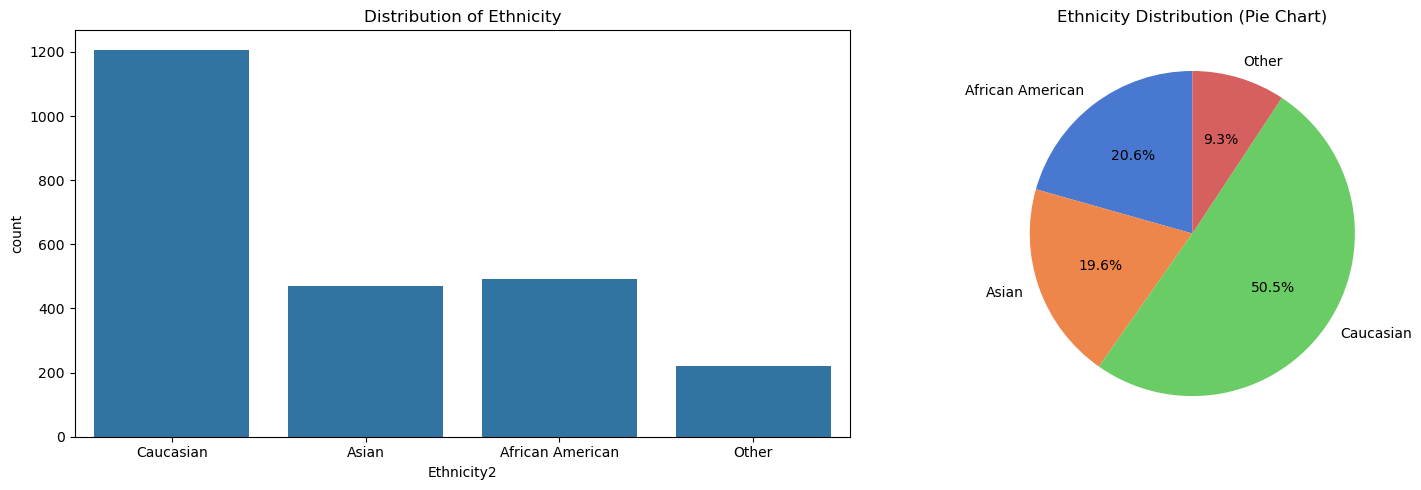

In [23]:
# Set custom labels
labels = ['African American', 'Asian', 'Caucasian', 'Other']
labels_bar = ['Caucasian', 'Asian', 'African American', 'Other']
ticks = range(len(labels))

# Create a figure with the two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the count plot on the first subplot
sns.countplot(data=df2, x='Ethnicity2', ax=axes[0])
axes[0].set_title('Distribution of Ethnicity')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels_bar)

# Calculate the counts for the pie chart
ethnicity_counts = df2['Ethnicity2'].value_counts().sort_index()

# Plot the pie chart on the second subplot
axes[1].pie(ethnicity_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
axes[1].set_title('Ethnicity Distribution (Pie Chart)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

*The school has an overwhelmingly Caucasian population followed by African American then Asian.*

**Question #2: What is the grade class distribution?**

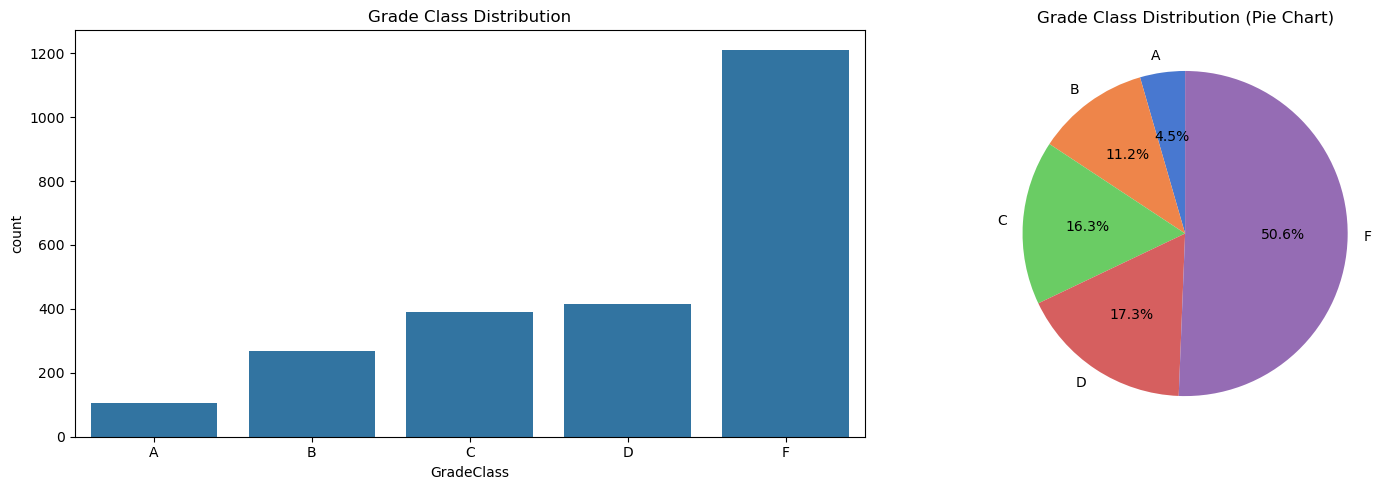

In [26]:
# Set custom labels
labels = ['A', 'B', 'C', 'D', 'F']
ticks = range(len(labels))

# Create a figure with the two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the count plot on the first subplot
sns.countplot(data=df, x='GradeClass', ax=axes[0])
axes[0].set_title('Grade Class Distribution')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels)

# Calculate the counts for the pie chart
grade_counts = df['GradeClass'].value_counts().sort_index()

# Plot the pie chart on the second subplot
axes[1].pie(grade_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
axes[1].set_title('Grade Class Distribution (Pie Chart)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

*Over half the students are in the 'F' grade category. Suggesting an underperforming school.*

**Question #3: What is the overall spread of the GPA?**

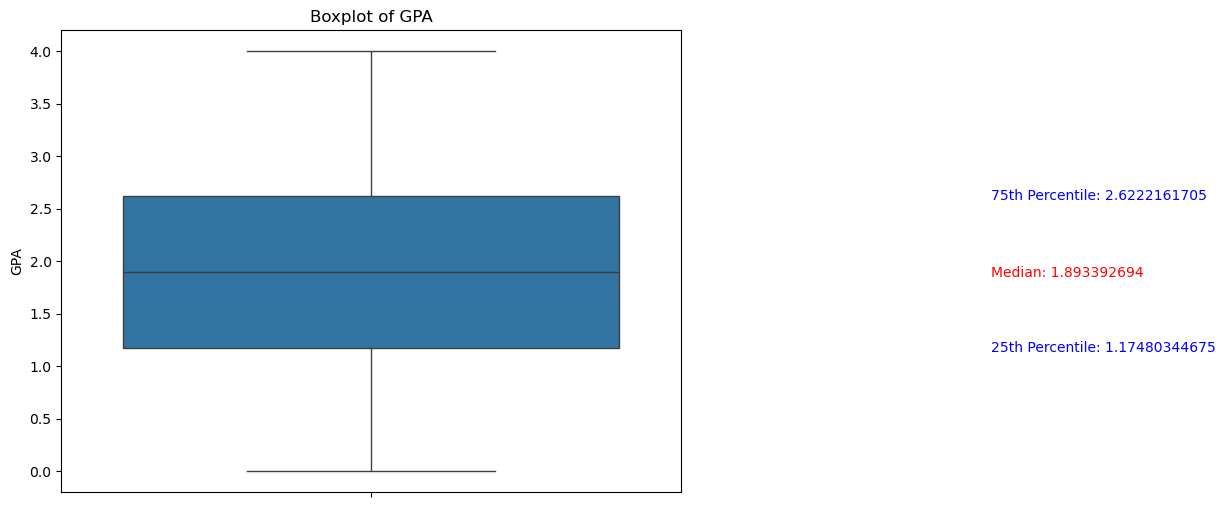

In [29]:
# Create a boxplot for GPA
plt.figure(figsize=(8, 6))
sns.boxplot(y='GPA', data=df2)  

# Calculate the median and percentiles
median = np.median(df2['GPA'])
percentiles = np.percentile(df2['GPA'], [25, 75])

# Label the median and percentiles on the boxplot
plt.text(1, median, f'Median: {median}', ha='left', va='center', color='red')
plt.text(1, percentiles[0], f'25th Percentile: {percentiles[0]}', ha='left', va='center', color='blue')
plt.text(1, percentiles[1], f'75th Percentile: {percentiles[1]}', ha='left', va='center', color='blue')

# Customize the boxplot
plt.title('Boxplot of GPA')
plt.ylabel('GPA')
plt.show()

*The GPA is spread evenly not skewed in either direction.*

**Question #4: Compare the spread of GPA by ethnicity.**

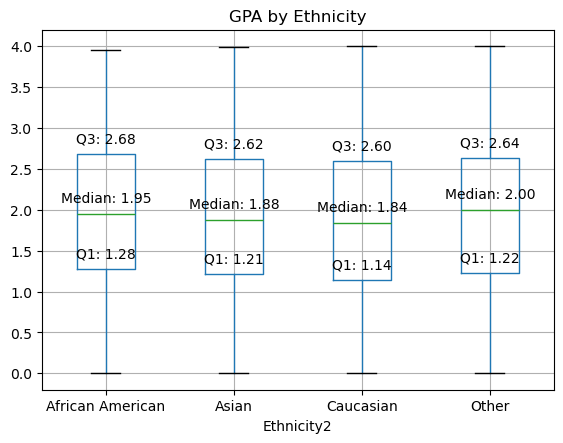

In [32]:
# Create boxplot
ax = df2.boxplot(by='Ethnicity2', column='GPA')
plt.title('GPA by Ethnicity')
plt.suptitle('')  # Remove default title

# Add labels to the boxplot
stats = df2.groupby('Ethnicity2')['GPA'].describe()
for i, gender in enumerate(stats.index):
    ax.text(i + 1, stats.loc[gender, '75%'] + 0.1, f'Q3: {stats.loc[gender, "75%"]:.2f}', ha='center', va='bottom')
    ax.text(i + 1, stats.loc[gender, '50%'] + 0.1, f'Median: {stats.loc[gender, "50%"]:.2f}', ha='center', va='bottom')
    ax.text(i + 1, stats.loc[gender, '25%'] + 0.1, f'Q1: {stats.loc[gender, "25%"]:.2f}', ha='center', va='bottom')

plt.show()

**Question #5: What is the overall distribution of GPA?**

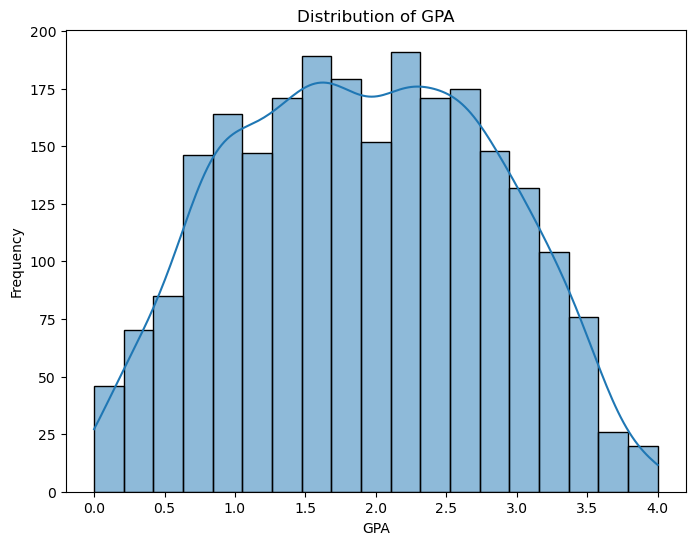

In [34]:
# Data Visualization and Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df2['GPA'], kde=True)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

*The 'GPA' follows a normal distribution.*

**Question #6: How much time are students studying per week?**

Text(0.5, 1.0, "Distribution of Student's Study Time")

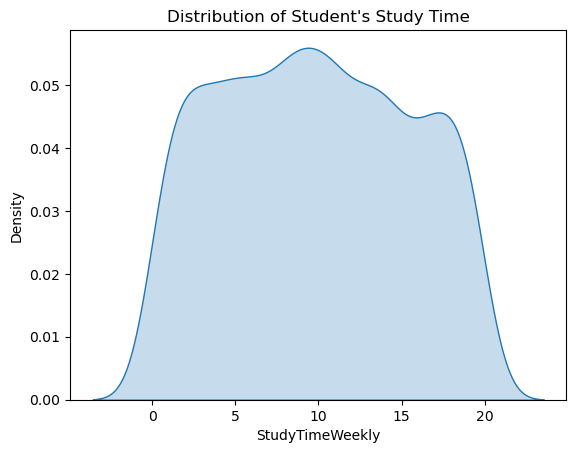

In [37]:
sns.kdeplot(df2['StudyTimeWeekly'], fill=True)
plt.title("Distribution of Student's Study Time")

*Students are studying an average of 10 hours/week.*

In [39]:
df_numeric = df2.corr(numeric_only=True)

In [40]:
corr = df_numeric.corr()

**Question #7: How are all the variables correlated?**

In [42]:
corr

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Grade_Scale
StudentID,1.00,-0.15,-0.10,-0.09,-0.07,-0.04,0.06,-0.09,-0.09,-0.08,-0.11,-0.09,-0.05,-0.09,-0.09
Age,-0.15,1.00,0.03,-0.12,-0.02,-0.11,0.01,-0.10,-0.03,-0.12,-0.17,-0.08,-0.04,-0.06,-0.06
Gender,-0.10,0.03,1.00,-0.04,-0.06,-0.08,0.07,-0.15,-0.09,-0.10,-0.10,-0.07,-0.07,-0.11,-0.11
Ethnicity,-0.09,-0.12,-0.04,1.00,-0.01,-0.08,-0.03,-0.11,-0.05,-0.09,-0.08,-0.11,-0.04,-0.01,-0.02
ParentalEducation,-0.07,-0.02,-0.06,-0.01,1.00,-0.14,0.12,-0.13,-0.16,-0.07,-0.08,-0.01,-0.04,-0.16,-0.16
StudyTimeWeekly,-0.04,-0.11,-0.08,-0.08,-0.14,1.00,-0.14,-0.00,-0.01,-0.13,-0.07,-0.08,-0.13,0.22,0.21
Absences,0.06,0.01,0.07,-0.03,0.12,-0.14,1.00,-0.14,-0.15,-0.07,0.03,-0.05,0.01,-0.99,-0.98
Tutoring,-0.09,-0.10,-0.15,-0.11,-0.13,-0.00,-0.14,1.00,-0.07,-0.05,-0.05,-0.10,-0.19,0.19,0.18
ParentalSupport,-0.09,-0.03,-0.09,-0.05,-0.16,-0.01,-0.15,-0.07,1.00,-0.10,-0.10,-0.02,-0.11,0.23,0.21
Extracurricular,-0.08,-0.12,-0.10,-0.09,-0.07,-0.13,-0.07,-0.05,-0.10,1.00,-0.09,-0.11,-0.09,0.09,0.09


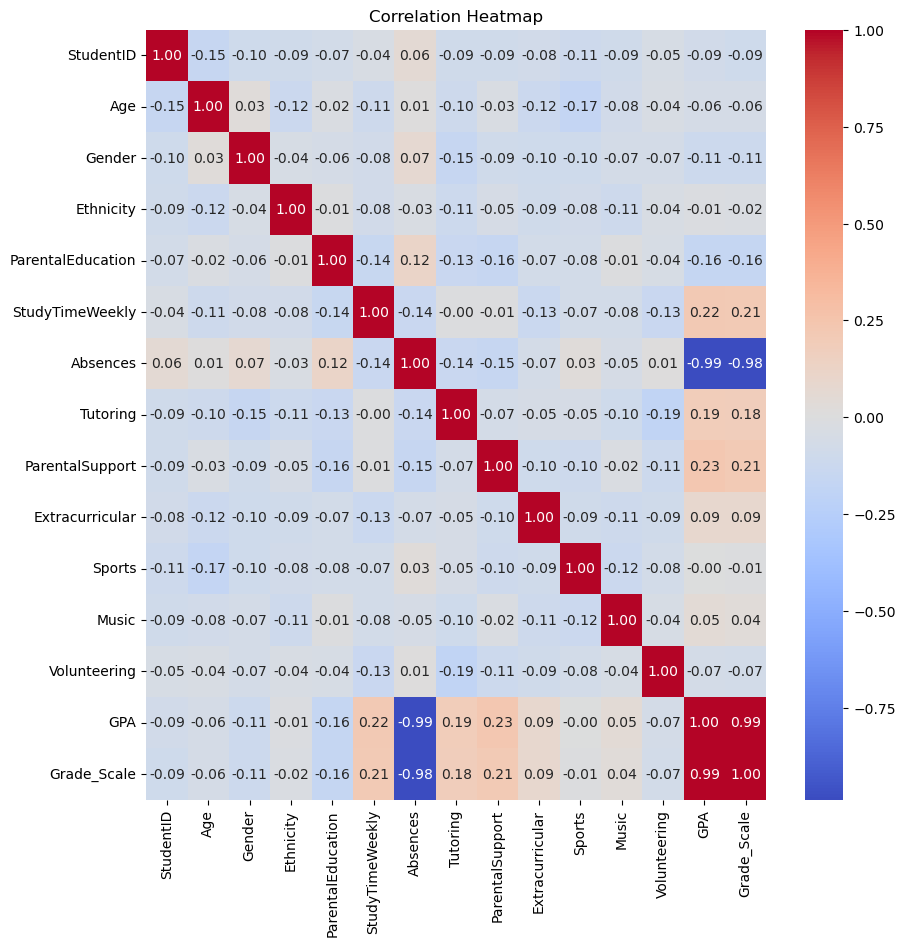

In [43]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
# The correlated pairs

corr_pairs = corr.unstack()

corr_pairs

StudentID    StudentID            1.00
             Age                 -0.15
             Gender              -0.10
             Ethnicity           -0.09
             ParentalEducation   -0.07
                                  ... 
Grade_Scale  Sports              -0.01
             Music                0.04
             Volunteering        -0.07
             GPA                  0.99
             Grade_Scale          1.00
Length: 225, dtype: float64

In [45]:
# The correlated pairs in descending order

sorted_pairs = corr_pairs.sort_values(ascending=False)

sorted_pairs

StudentID     StudentID       1.00
Age           Age             1.00
GPA           GPA             1.00
Volunteering  Volunteering    1.00
Music         Music           1.00
                              ... 
Volunteering  Tutoring       -0.19
Grade_Scale   Absences       -0.98
Absences      Grade_Scale    -0.98
              GPA            -0.99
GPA           Absences       -0.99
Length: 225, dtype: float64

**Question #8: Which variables have the highest correlation?**

In [47]:
# Filter out the factors with the highest positive correlation 

high_corr = sorted_pairs[(sorted_pairs > .5) & (sorted_pairs < 1)] 

high_corr

Grade_Scale  GPA           0.99
GPA          Grade_Scale   0.99
dtype: float64

*The variables with the highest correlation are 'Grade Scale' and 'GPA' since one is derived from the other.  Other than that, no other variables have a significant positive correlation.*

In [49]:
# Filter out the factors with the highest negative correlation 
high_neg_corr = sorted_pairs[(sorted_pairs) < -.5]

high_neg_corr

Grade_Scale  Absences      -0.98
Absences     Grade_Scale   -0.98
             GPA           -0.99
GPA          Absences      -0.99
dtype: float64

*The variables with the highest negative correlation are the 'GPA' and 'Absences' along with the 'Grade Scale' and 'Absences.'  Which suggest an inverse relationship between them. The more 'Absences' the lower the 'GPA' and 'Grade Scale' and vice versa.*

**Question #9: What is the relationship between 'Study Time' and 'GPA'?**

Text(0.5, 1.0, 'Study Time VS GPA')

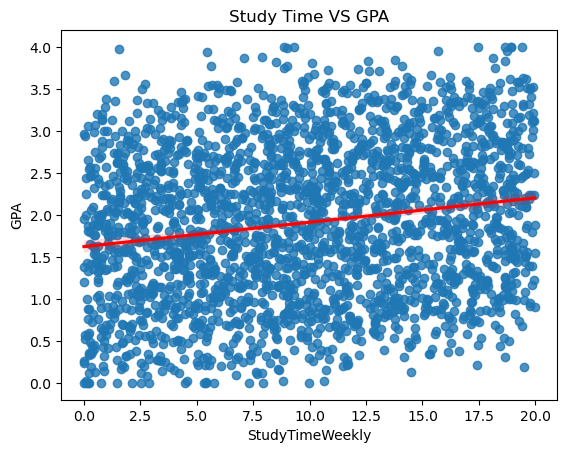

In [52]:
sns.regplot(data=df2, x='StudyTimeWeekly', y='GPA', line_kws={'color': 'red'})
plt.title('Study Time VS GPA')

*There exists a direct relationship between 'Study Time' and 'GPA.' Suggesting that the more time a student studies the higher his/her GPA.*

**Question #10: Which gender had the higher median GPA male or females?**

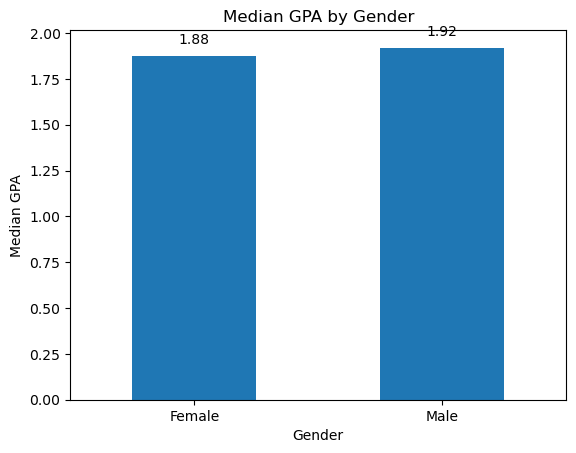

In [55]:
# Calculate 'Median' GPA by gender
median_gpa = df2.groupby('Gender2')['GPA'].median()

# Create bar chart
ax = median_gpa.plot(kind='bar') #, color=['blue', 'pink'])
plt.title('Median GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Median GPA')

# Add labels to the bars
for i, v in enumerate(median_gpa):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# Set the rotation of x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

plt.show()

*Males had a slightly higher median GPA.*

**Question #12: Who has a higher average GPA males or females?**

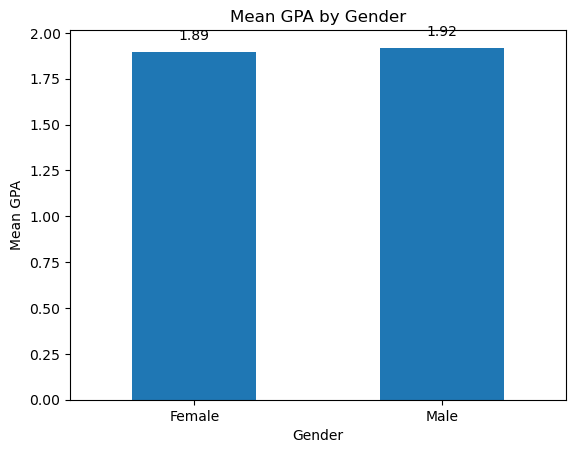

In [58]:
# Calculate 'Average' GPA by gender
mean_gpa = df2.groupby('Gender2')['GPA'].mean()

# Create bar chart
ax = mean_gpa.plot(kind='bar') #, color=['blue', 'pink'])
plt.title('Mean GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean GPA')

# Add labels to the bars
for i, v in enumerate(mean_gpa):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# Set the rotation of x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

plt.show()

*Males had a slightly higher average GPA as well.*

**Question #13: What is the median GPA by ethnicity?**

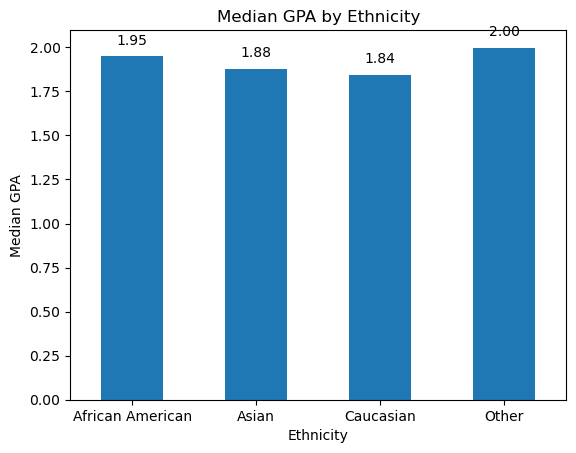

In [61]:
# Calculate median GPA by ethnicity
median_gpa_by_ethnicity = df2.groupby('Ethnicity2')['GPA'].median()

# Create bar chart
ax = median_gpa_by_ethnicity.plot(kind='bar') 
plt.title('Median GPA by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Median GPA')

# Add labels to the bars
for i, v in enumerate(median_gpa_by_ethnicity):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# Set the rotation of x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

plt.show()

*Interestingly, both Caucasian and African American students have a higher median GPA than Asian students which breaks the stereotype. Further analysis should be done on what region of Asia the students are from and if it makes a difference. If so, why? Also, note that the students in the smallest category had the highest median GPA.*

In [63]:
# Invert the columns of the data frame
df_inverted = df2.iloc[:, ::-1]

In [64]:
df_inverted.groupby(['Ethnicity2'])

df_inverted

,Gender2,Ethnicity2,Grade_Scale,GPA,Volunteering,Music,Sports,Extracurricular,ParentalSupport,Tutoring,Absences,StudyTimeWeekly,ParentalEducation,Ethnicity,Gender,Age,StudentID
0,Female,Caucasian,2,2.93,0,1,0,0,2,1,7,19.83,2,0,1,17,1001
1,Male,Caucasian,3,3.04,0,0,0,0,1,0,0,15.41,1,0,0,18,1002
2,Male,Asian,0,0.11,0,0,0,0,2,0,26,4.21,3,2,0,15,1003
3,Female,Caucasian,1,2.05,0,0,0,1,3,0,14,10.03,3,0,1,17,1004
4,Female,Caucasian,0,1.29,0,0,0,0,3,1,17,4.67,2,0,1,17,1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,Female,Caucasian,3,3.46,0,0,0,1,4,0,2,10.68,3,0,1,18,3388
2388,Male,Caucasian,3,3.28,0,0,1,0,4,1,4,7.58,1,0,0,17,3389
2389,Female,Caucasian,0,1.14,1,0,0,0,2,0,20,6.81,2,0,1,16,3390
2390,Female,African American,0,1.80,0,1,1,0,2,0,17,12.42,0,1,1,16,3391


In [65]:
ethnicity_group = df_inverted.groupby(['Ethnicity2'])

print(ethnicity_group)

**Question #14:  What is the count of students in each grade scale by ethnicity?**

In [67]:
ethnicity_group['Grade_Scale'].value_counts()

Ethnicity2        Grade_Scale
African American  0              254
                  1               87
                  2               80
                  3               53
                  4               19
Asian             0              246
                  1               88
                  2               71
                  3               48
                  4               17
Caucasian         0              663
                  1              194
                  2              193
                  3              123
                  4               34
Other             0              111
                  1               43
                  2               41
                  3               20
                  4                7
Name: count, dtype: int64

*There are a disproportionately higher number of 'F' students than 'A' students across the spectrum at this particular school.*

**Question #15: What is the median GPA broken down by ethnicity?**

In [70]:
ethnicity_group['GPA'].median()

Ethnicity2
African American   1.95
Asian              1.88
Caucasian          1.84
Other              2.00
Name: GPA, dtype: float64

*Note: The students in the smallest category classified as 'Other' had the highest median GPA.*

**Question #16: What is the relationship between the number of absenses and GPA?**

Text(0.5, 1.0, 'Absenses VS GPA')

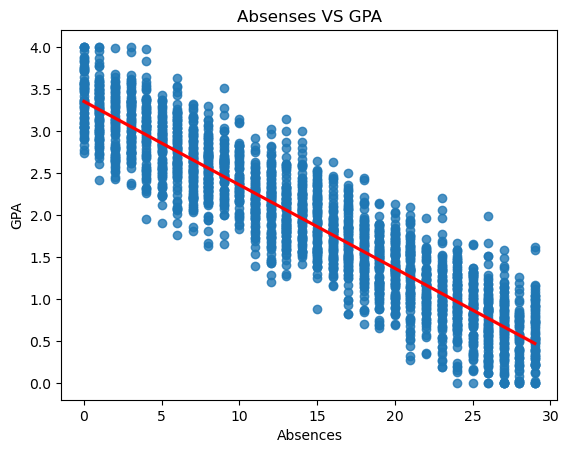

In [73]:
sns.regplot(data=df2, x='Absences', y='GPA', line_kws={'color': 'red'})

plt.title('Absenses VS GPA')

*There exists an inverse relationship between absenses and GPA. Suggesting the more absenses the lower the GPA and vice versa.*

**Question #17: Does the level of parental support have an impact on students grades?**

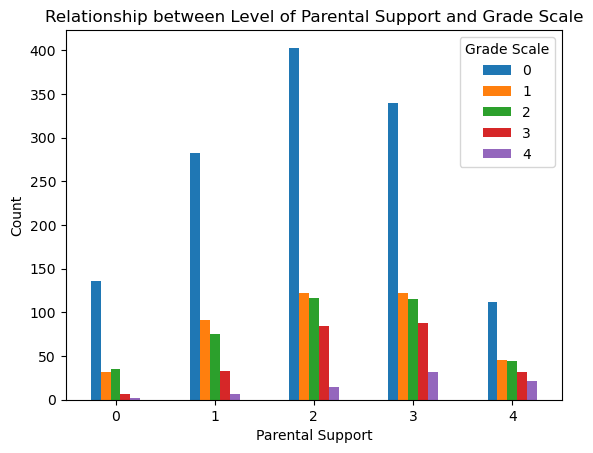

In [76]:
# Group the data by 'ParentalSupport' and 'Grade Scale' and count the occurrences
grouped_data = df2.groupby(['ParentalSupport', 'Grade_Scale']).size().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=False)
plt.title('Relationship between Level of Parental Support and Grade Scale')
plt.xlabel('Parental Support')
plt.ylabel('Count')
plt.legend(title='Grade Scale')
plt.xticks(rotation=0)

plt.show()

*Interestingly, there exists a higher number of 'F' students that received a moderate level of parental support than the number of 'F' students that received no support. That's assuming the 'F' students were telling the truth. On the other contrary, there exists a very little number of 'A' and 'B' students that received no support. And, a high number of 'A' and 'B' students that received high levels of support. Suggesting, for the most part, that the higher the level of parental support the higher the grade class the student will achieve.*

**Question #18: Does ethnicity and in turn culture play a part in the grade class a student is in?**

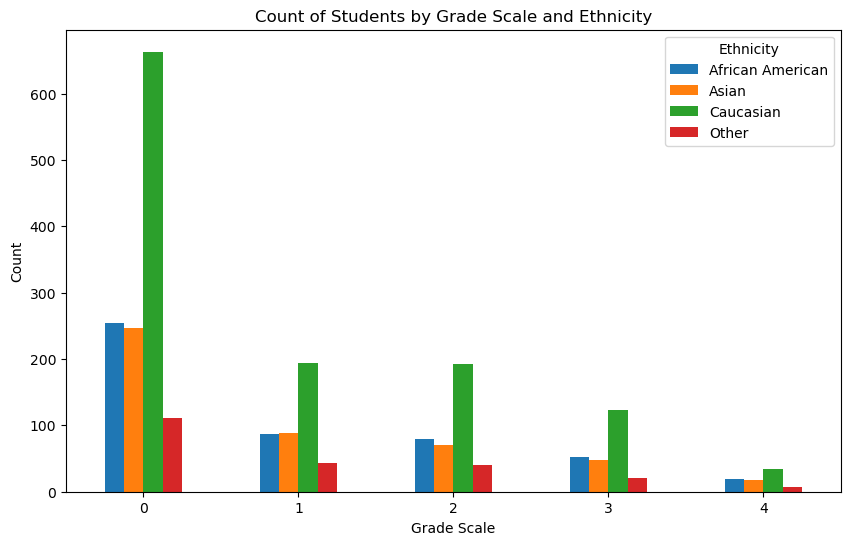

In [79]:
# Step 3: Group and count the data by grade and ethnicity
grouped_data_ethnicity = df2.groupby(['Grade_Scale', 'Ethnicity2']).size().unstack().fillna(0)

# Step 4: Plot the bar chart
grouped_data_ethnicity.plot(kind='bar', figsize=(10, 6))

# Step 5: Customize the plot
plt.title('Count of Students by Grade Scale and Ethnicity')
plt.xlabel('Grade Scale')
plt.ylabel('Count')
plt.legend(title='Ethnicity')
plt.xticks(rotation=0)

# Show the plot
plt.show()


*The count of students in each grade scale follows the same distribution as the overall demographics. Which suggests that ethnicity does not play a part in the grade class a student is in. At least, not significantly.*

**Question #14: What is the level of parental support broken down by ethnicity?**

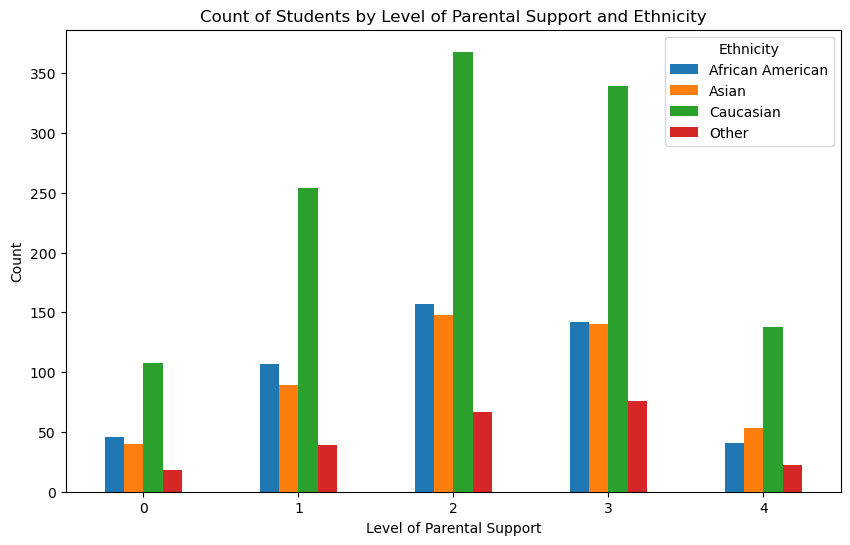

In [82]:
# Step 3: Group and count the data by parental support and ethnicity
grouped_data_ethnicity_support = df2.groupby(['ParentalSupport', 'Ethnicity2']).size().unstack().fillna(0)

# Step 4: Plot the bar chart
grouped_data_ethnicity_support.plot(kind='bar', figsize=(10, 6))

# Step 5: Customize the plot
plt.title('Count of Students by Level of Parental Support and Ethnicity')
plt.xlabel('Level of Parental Support')
plt.ylabel('Count')
plt.legend(title='Ethnicity')
plt.xticks(rotation=0)

# Show the plot
plt.show()

*Interestingly, there are a higher number of Asian students than African American students that receive the highest level of parental support despite being a smaller population. Suggesting that Asian students receive a higher level of parental support than African American students.*

**Question #15: Does the number of absences effect the grade class a student is in?**

In [85]:
grade_scale_group = df2.groupby('Grade_Scale')

In [86]:
absenses_by_grade_scale = grade_scale_group['Absences'].median()

absenses_by_grade_scale

Grade_Scale
0   21.00
1   11.00
2    6.00
3    3.00
4    1.00
Name: Absences, dtype: float64

*'F' students had an average of 21 absences per school year. Contrary to, the 'A' students who had an average of 1 absence per school year. Therefore, the answer is a resounding 'Yes, indeed!'*

**Question #16: What is the median time spent studying broken down by grade class? Does more time spent studying result in higher grades?**

In [89]:
median_time_studying = grade_scale_group['StudyTimeWeekly'].median()

median_time_studying

Grade_Scale
0    8.83
1    9.91
2   10.28
3   11.55
4   13.55
Name: StudyTimeWeekly, dtype: float64

*'F' students spent a median of 8.83 hours/week studying. Contrary to the 'A' students who spent a median of 13.55 hours/week studying. So, 'yes' more time studying results in higher grades.*

**Question #17: What role does both median time studying and absences play in the grade class a student is in?**

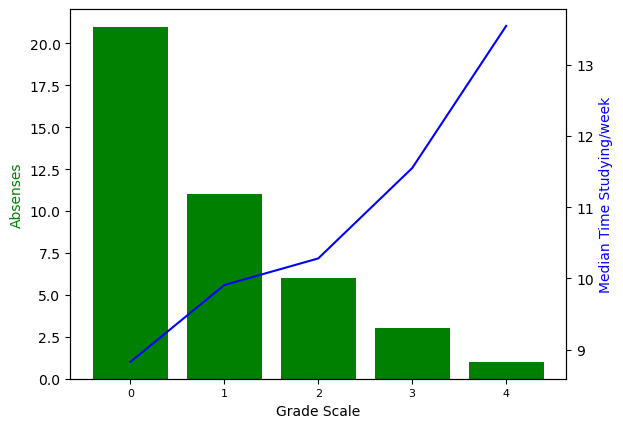

In [92]:
grade_scale = [0, 1, 2, 3, 4]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(grade_scale, absenses_by_grade_scale, color='g')
ax2.plot(grade_scale, median_time_studying, 'b-')

ax1.set_xlabel('Grade Scale')
ax1.set_ylabel('Absenses', color='g')
ax2.set_ylabel('Median Time Studying/week', color='b')
ax1.set_xticks(range(len(grade_scale_group))) # Sets the position of ticks to match the number of grade classes.
ax1.set_xticklabels(grade_scale, size=8)

plt.show()

*The combination chart clearly shows a direct relationship between grade class and time spent studying. And, an indirect relationship between grade class and the number of absences. In other words, the more time studying the higher the students grades. And, vice versa, the more absences the lower the students grades.*

**Question #18: Does tutoring help improve students grades?**

In [95]:
# Count the number of students that received tutoring for each Grade Scale
tutored_counts = df2[df2['Tutoring'] == True].groupby('Grade_Scale').size()

print(tutored_counts)

Grade_Scale
0    345
1    116
2    113
3    102
4     45
dtype: int64


In [96]:
# Count the number of students that did not received tutoring for each Grade Scale
non_tutored_counts = df2[df2['Tutoring'] == False].groupby('Grade_Scale').size()

print(non_tutored_counts)

Grade_Scale
0    929
1    296
2    272
3    142
4     32
dtype: int64


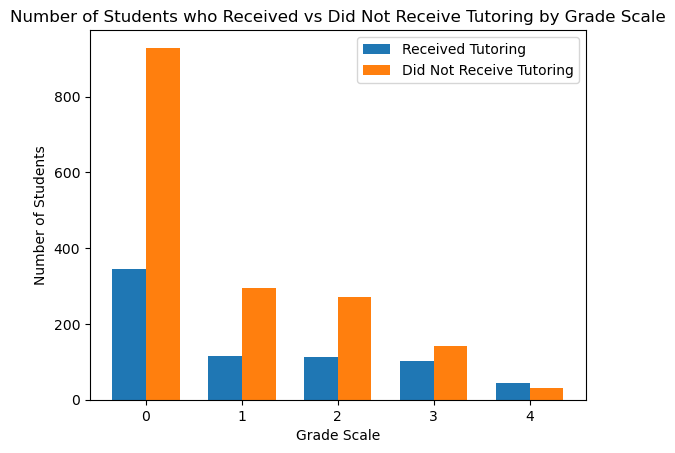

In [97]:
# Initialize variables
grades = ['0', '1', '2', '3', '4']
tutored_students = [345, 116, 113, 102, 45]  # Number of students who received tutoring for each grade class
non_tutored_students = [929, 296, 272, 142, 32]  # Number of students who did not receive tutoring for each grade class

# Create bar chart
bar_width = 0.35
index = range(len(grades))
plt.bar(index, tutored_students, bar_width, label='Received Tutoring')
plt.bar([i + bar_width for i in index], non_tutored_students, bar_width, label='Did Not Receive Tutoring')

# Add labels
plt.xlabel('Grade Scale')
plt.ylabel('Number of Students')
plt.title('Number of Students who Received vs Did Not Receive Tutoring by Grade Scale')
plt.xticks([i + bar_width/2 for i in index], grades)
plt.legend()

# Show the plot
plt.show()

*An overwhelming majority of students in the lowest grade class did not receive tutoring versus those that did. Moreover, more students in the highest grade glass received tutoring than not. Thus, tutoring does indeed have a positive impact on students grades.*

**Question #19: Which gender seeks the help of a tutor more?**

In [100]:
# Count the number of students that received tutoring for each Gender
tutored_counts = df2[df2['Tutoring'] == True].groupby('Gender2').size()

print(tutored_counts)

Gender2
Female    351
Male      370
dtype: int64


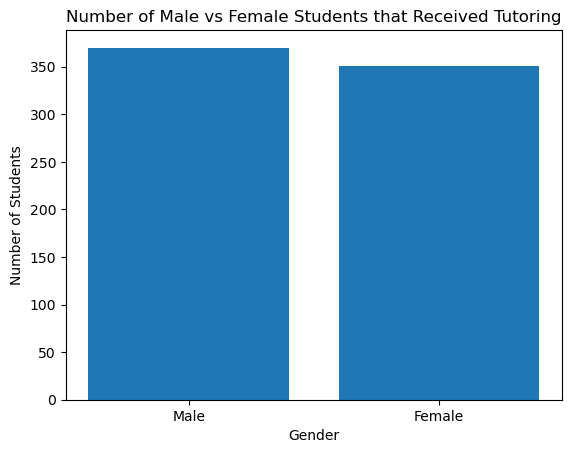

In [101]:
# Data
categories = ['Male', 'Female']
tutoring_counts = [370, 351]  

# Create bar chart
plt.bar(categories, tutoring_counts)

# Add title and labels
plt.title('Number of Male vs Female Students that Received Tutoring')
plt.xlabel('Gender')
plt.ylabel('Number of Students')

# Display the chart
plt.show()

*Paradoxically, more males seek the help of a tutor than females.*